In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data from Drive
DATA_PATH="/content/drive/My Drive/J_PHD/CICDDOS/"
!ls "/content/drive/My Drive/J_PHD/CICDDOS"

dataset_sdn.csv  ldap.csv   netBIOS.csv  snmp.csv  syn.csv   udp.csv
dns.csv		 mssql.csv  ntp.csv	 ssdp.csv  tftp.csv  udplag.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Flatten
from keras.layers import Dense, LSTM, Convolution1D, MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import Bidirectional

from sklearn import metrics

In [ ]:
DrDoS_DNS_data_1_per = pd.read_csv(DATA_PATH+'dns.csv')
DrDoS_LDAP_data_2_0_per = pd.read_csv(DATA_PATH+'ldap.csv')
DrDoS_MSSQL_data_1_3_per = pd.read_csv(DATA_PATH+'mssql.csv')
DrDoS_NetBIOS_data_1_3_per = pd.read_csv(DATA_PATH+'netBIOS.csv')
DrDoS_NTP_data_data_5_per = pd.read_csv(DATA_PATH+'ntp.csv')
DrDoS_SNMP_data_1_3_per = pd.read_csv(DATA_PATH+'snmp.csv')
DrDoS_SSDP_data_2_per = pd.read_csv(DATA_PATH+'ssdp.csv')
DrDoS_UDP_data_2_per = pd.read_csv(DATA_PATH+'udp.csv')
Syn_data_4_per = pd.read_csv(DATA_PATH+'syn.csv')
UDPLag_data_2_0_per = pd.read_csv(DATA_PATH+'udplag.csv')

<ipython-input-4-656995ac6163>:1: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_DNS_data_1_per = pd.read_csv(DATA_PATH+'dns.csv')
<ipython-input-4-656995ac6163>:2: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_LDAP_data_2_0_per = pd.read_csv(DATA_PATH+'ldap.csv')
<ipython-input-4-656995ac6163>:3: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_MSSQL_data_1_3_per = pd.read_csv(DATA_PATH+'mssql.csv')
<ipython-input-4-656995ac6163>:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_NetBIOS_data_1_3_per = pd.read_csv(DATA_PATH+'netBIOS.csv')
<ipython-input-4-656995ac6163>:5: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_NTP_data_data_5_per = pd.read_csv(DATA_PATH+'ntp.csv')
<ipython-i

In [ ]:
# Merge all the Dataset to make one data
data = pd.concat([DrDoS_DNS_data_1_per, DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_1_3_per, DrDoS_NetBIOS_data_1_3_per, DrDoS_NTP_data_data_5_per, DrDoS_SNMP_data_1_3_per, DrDoS_SSDP_data_2_per, DrDoS_UDP_data_2_per, Syn_data_4_per, UDPLag_data_2_0_per])

In [ ]:
data.shape

(400000, 89)

In [ ]:
data.rename(columns={' Label': 'label'}, inplace=True)

In [ ]:
data['label'].value_counts()

Syn              39995
DrDoS_LDAP       39994
DrDoS_UDP        39991
UDP-lag          39990
DrDoS_SNMP       39959
DrDoS_SSDP       39891
DrDoS_NetBIOS    39845
DrDoS_MSSQL      39352
DrDoS_DNS        38299
DrDoS_NTP        27659
BENIGN           15019
WebDDoS              6
Name: label, dtype: int64

In [ ]:
# Drop Unnamed:0, Unnamed:0.1 columns
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [ ]:
# droping nan and inf rows
# first replacing all inf values with nan
data_real = data.replace(np.inf, np.nan)

In [ ]:
data_real.isnull().sum().sum()

19256

In [ ]:
data_df = data_real.dropna(axis=0)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
df1 = data_df
df1.loc[df1.label == "BENIGN", "label"] = 1.0
df1.loc[df1.label != 1, "label"] = 0.0

In [ ]:
df1.label.unique()

array([0.0, 1.0], dtype=object)

In [ ]:
df1.label.value_counts()

0.0    375436
1.0     14936
Name: label, dtype: int64

In [ ]:
numeric_df = df1.select_dtypes(include=['int64', 'float64'])
object_df = df1.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' P

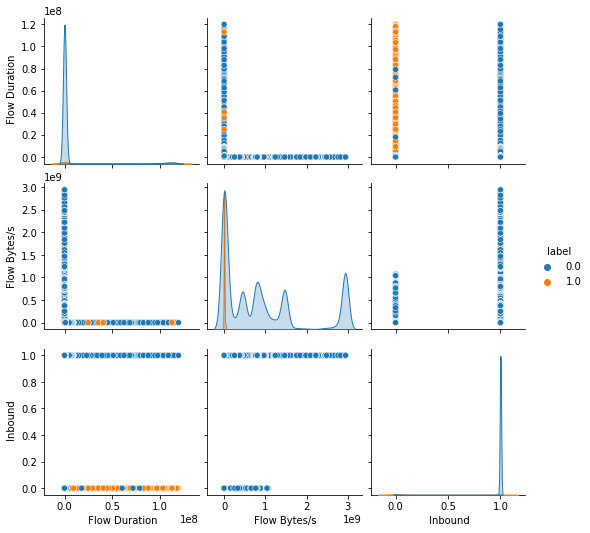

In [ ]:
sns.pairplot(df1,hue="label",vars=[' Flow Duration', 'Flow Bytes/s', ' Inbound' ])

In [ ]:
data_X = df1.drop(['label','SimillarHTTP'], axis = 1)

In [ ]:
data_X.shape

(390372, 85)

In [ ]:
data_y = df1['label']

In [ ]:
data_y.shape

(390372,)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
data_y.unique()

array([0.0, 1.0], dtype=object)

In [ ]:
data_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39995    0.0
39996    0.0
39997    0.0
39998    0.0
39999    0.0
Name: label, Length: 390372, dtype: object

In [ ]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,172.16.0.5-192.168.50.1-57151-14047-17,172.16.0.5,57151,192.168.50.1,14047,17,2018-12-01 13:04:59.420235,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39996,172.16.0.5-192.168.50.1-58534-39869-17,172.16.0.5,58534,192.168.50.1,39869,17,2018-12-01 13:04:59.421387,2,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39997,172.16.0.5-192.168.50.1-59491-26346-17,172.16.0.5,59491,192.168.50.1,26346,17,2018-12-01 13:04:59.427021,2,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39998,172.16.0.5-192.168.50.1-57565-51456-17,172.16.0.5,57565,192.168.50.1,51456,17,2018-12-01 13:04:59.427638,3,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**Label Encoding for the Dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)
data_y_trans

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
le_fid = LabelEncoder()

In [ ]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])
le_SIP = LabelEncoder()
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])
le_DIP = LabelEncoder()
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [ ]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,235180,28,634,160,60495,17,39711,28415,97,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,177539,145,634,35,60495,17,39712,2,2,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,228665,28,634,160,46391,17,39713,48549,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,212797,28,634,160,11894,17,39714,48337,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,220109,28,634,160,27878,17,39715,32026,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,156493,28,57151,160,14047,17,353804,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39996,165505,28,58534,160,39869,17,353805,2,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39997,171085,28,59491,160,26346,17,353806,2,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39998,159155,28,57565,160,51456,17,353807,3,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**Feature Selection**

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([7.54019219e-02, 1.40268829e-01, 2.00064951e-02, 1.15453034e-01,
       3.36167540e-02, 1.10535286e-02, 3.77036208e-02, 2.67408552e-03,
       7.01717852e-04, 9.67171750e-04, 2.23363369e-03, 1.72086223e-04,
       1.05873698e-03, 1.16885755e-02, 7.34937967e-03, 4.23227316e-04,
       1.01129049e-02, 1.56239392e-02, 1.82113300e-02, 2.49327860e-03,
       6.74503507e-03, 3.05619895e-03, 1.22310088e-04, 1.76737373e-04,
       1.31065873e-03, 6.61572105e-04, 1.64029294e-03, 8.27945129e-04,
       7.91863170e-04, 4.33162172e-04, 1.58454834e-04, 2.13885202e-03,
       3.01958281e-04, 5.95716237e-04, 2.87333058e-04, 2.79055116e-03,
       1.38510127e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.04056770e-03, 9.04334237e-04, 3.64328699e-03, 5.62083072e-04,
       1.19042283e-02, 4.50329862e-03, 1.23392007e-03, 2.37501866e-03,
       4.56113970e-04, 0.00000000e+00, 2.49640532e-04, 1.79864052e-02,
       0.00000000e+00, 1.95450925e-02, 5.38628644e-02, 2.54133571e-02,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

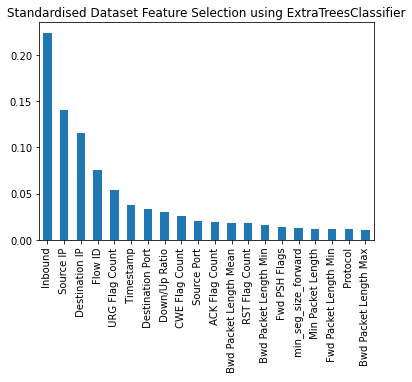

In [ ]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_X.shape

(390372, 85)

In [ ]:
data_new_20features_X = data_X[[' Timestamp', ' Source IP', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

**Train Test Split 20 Feature Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

**Standardization of the 20 Feature Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [ ]:
X_train_std_20.shape

(273260, 20)

In [ ]:
y_train_20.shape

(273260,)

In [ ]:
X_test_std_20.shape

(117112, 20)

In [ ]:
y_test_20.shape

(117112,)

In [ ]:
import matplotlib.pyplot as plt
def show_acc(history, val = False):
    acc = history.history['acc']

    loss = history.history['loss']
    print("Train accuracy :", history.history['acc'][-1])

    if val:
        val_acc = history.history['val_acc']
        val_loss = history.history['val_loss']
        print("Test accuracy  :", history.history['val_acc'][-1])

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'g', label='Training acc')
    if val:
        plt.plot(epochs, val_acc, 'r', label='Testing acc')
        plt.title('Training and testing accuracy')
    else:
        plt.title('Training accuracy')

    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'g', label='Training loss')

    if val:

        plt.plot(epochs, val_loss, 'r', label='Testing loss')
        plt.title('Training and test loss')
    else:
        plt.title("Training loss")
    plt.legend()

    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout, Flatten, Dense

In [ ]:
Classifier_accuracy = []

In [ ]:
input_shape = (20, 1)

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(rate=0.2))

model.add(LSTM(units=64, return_sequences=True))

model.add(Flatten())

model.add(Dense(units=32, activation='relu'))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 32)             0         
                                                                 
 lstm (LSTM)                 (None, 9, 64)             24832     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 32)                18464     
                                                        

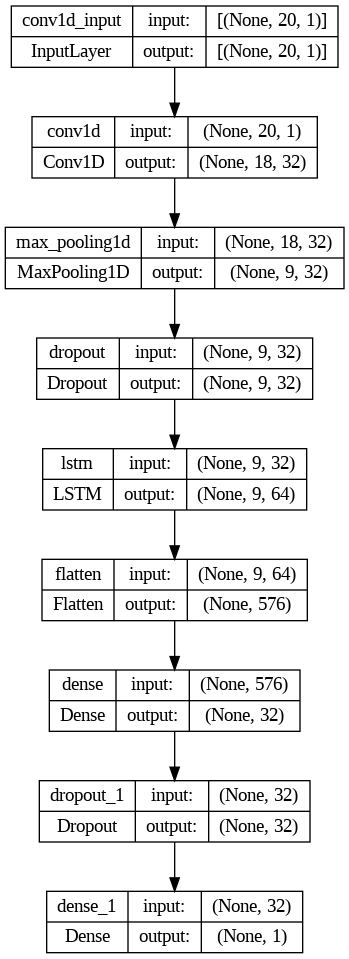

In [ ]:

from keras.utils import plot_model
from IPython import display


plot_model(model, show_shapes=True)


In [ ]:
history = model.fit(X_train_std_20, y_train_20,  validation_data=(X_test_std_20, y_test_20), batch_size=200, epochs= 20, verbose=2,callbacks=None, shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0)

Epoch 1/20
1367/1367 - 50s - loss: 0.0011 - acc: 0.9998 - val_loss: 8.5791e-04 - val_acc: 0.9998 - 50s/epoch - 37ms/step
Epoch 2/20
1367/1367 - 56s - loss: 0.0011 - acc: 0.9998 - val_loss: 7.8775e-04 - val_acc: 0.9998 - 56s/epoch - 41ms/step
Epoch 3/20
1367/1367 - 54s - loss: 8.5412e-04 - acc: 0.9998 - val_loss: 5.7395e-04 - val_acc: 0.9999 - 54s/epoch - 39ms/step
Epoch 4/20
1367/1367 - 56s - loss: 7.0826e-04 - acc: 0.9998 - val_loss: 4.4581e-04 - val_acc: 0.9999 - 56s/epoch - 41ms/step
Epoch 5/20
1367/1367 - 52s - loss: 6.7286e-04 - acc: 0.9998 - val_loss: 3.4327e-04 - val_acc: 0.9999 - 52s/epoch - 38ms/step
Epoch 6/20
1367/1367 - 57s - loss: 5.9697e-04 - acc: 0.9999 - val_loss: 3.5278e-04 - val_acc: 0.9999 - 57s/epoch - 42ms/step
Epoch 7/20
1367/1367 - 54s - loss: 4.2070e-04 - acc: 0.9999 - val_loss: 2.3244e-04 - val_acc: 0.9999 - 54s/epoch - 40ms/step
Epoch 8/20
1367/1367 - 54s - loss: 3.7846e-04 - acc: 0.9999 - val_loss: 1.4138e-04 - val_acc: 1.0000 - 54s/epoch - 39ms/step
Epoch 9/

Train accuracy : 0.9999743700027466
Test accuracy  : 0.9999914765357971


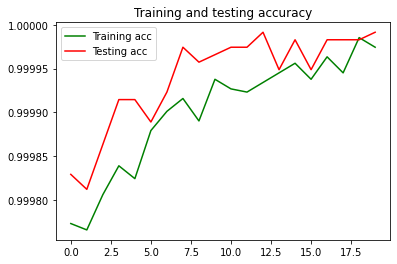

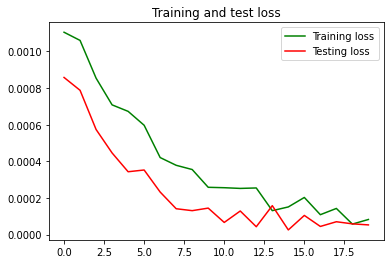

In [ ]:
show_acc(history, val=True)

In [ ]:
#predict = model.predict(X_test_std_20, verbose=1)
loss, accuracy = model.evaluate(X_test_std_20, y_test_20)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

3660/3660 [==============================] - 19s 5ms/step - loss: 5.3124e-05 - acc: 1.0000
Accuracy of Deep neural Network : 100.00


In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

# Define input shape
input_shape = (20, 1)

# Define the model
model = Sequential()

# Add a GRU layer with 64 units and ReLU activation
model.add(GRU(units=64, activation='relu', input_shape=input_shape))

# Add a dropout layer to prevent overfitting
model.add(Dropout(rate=0.2))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(rate=0.2))

# Add the output layer with a sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


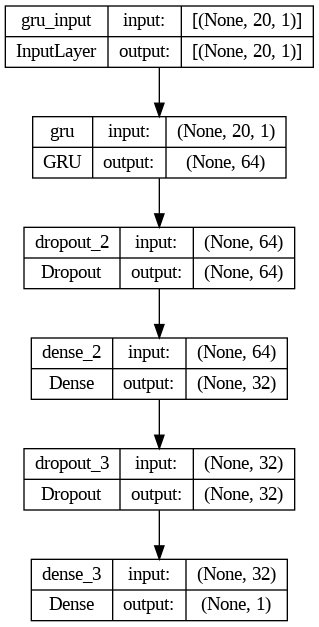

In [ ]:
from keras.utils import plot_model
from IPython import display


plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train_std_20, y_train_20,  validation_data=(X_test_std_20, y_test_20), batch_size=200, epochs= 20, verbose=2,callbacks=None, shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0)

Epoch 1/20
1367/1367 - 65s - loss: 0.0388 - acc: 0.9884 - val_loss: 0.0067 - val_acc: 0.9974 - 65s/epoch - 48ms/step
Epoch 2/20
1367/1367 - 63s - loss: 0.0061 - acc: 0.9981 - val_loss: 0.0050 - val_acc: 0.9990 - 63s/epoch - 46ms/step
Epoch 3/20
1367/1367 - 62s - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0013 - val_acc: 0.9998 - 62s/epoch - 45ms/step
Epoch 4/20
1367/1367 - 61s - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0012 - val_acc: 0.9998 - 61s/epoch - 45ms/step
Epoch 5/20
1367/1367 - 60s - loss: 0.0012 - acc: 0.9998 - val_loss: 9.1117e-04 - val_acc: 0.9998 - 60s/epoch - 44ms/step
Epoch 6/20
1367/1367 - 64s - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0010 - val_acc: 0.9998 - 64s/epoch - 47ms/step
Epoch 7/20
1367/1367 - 61s - loss: 0.0011 - acc: 0.9998 - val_loss: 7.6044e-04 - val_acc: 0.9998 - 61s/epoch - 44ms/step
Epoch 8/20
1367/1367 - 60s - loss: 9.3240e-04 - acc: 0.9998 - val_loss: 6.9115e-04 - val_acc: 0.9999 - 60s/epoch - 44ms/step
Epoch 9/20
1367/1367 - 59s - loss: 9.2598e-04 - 